In [1]:

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise

from mpl_toolkits.mplot3d import Axes3D
import numpy as np


In [85]:

def generate_ND_perlin_noise(dimension_resolution, octaves, noise_rescaling = [0, 1]):
    noise = PerlinNoise(octaves=octaves)

    noise_max = noise_rescaling[1]
    noise_min= noise_rescaling[0]

    def recursive_build(dim_index, coords):
        if dim_index == len(dimension_resolution):

            rescaled_noise = noise_min + (noise(coords) + 1) * (noise_max - noise_min) / 2

            return rescaled_noise
        
        return [recursive_build(dim_index + 1, coords + [i / dimension_resolution[dim_index]])
                for i in range(dimension_resolution[dim_index])]

    return recursive_build(0, [])

def plot_2d(pic):
    plt.imshow(pic, cmap='gray')
    plt.colorbar()
    plt.show()




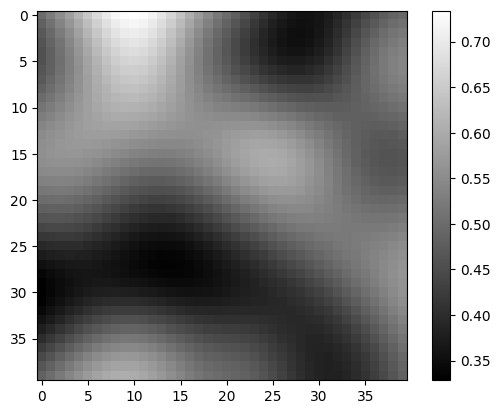

In [87]:

pic_2d = generate_ND_perlin_noise([40,40], 2, [0,1])

# for p in pic_2d:
#     print(p)

# print(max(max(pic_2d)))
# print(min(min(pic_2d)))
plot_2d(pic_2d)




In [91]:
import numpy as np

def flatten_nested_data(data):
    # Initialize empty lists for coordinates and values
    coordinates = []
    values = []

    # Helper function to recursively flatten the nested data
    def recursive_flatten(current_data, current_coords):
        for i, item in enumerate(current_data):
            if isinstance(item, list):
                # If the item is a list, recursively flatten it
                recursive_flatten(item, current_coords + [i])
            else:
                # If the item is a value, store its coordinates and value
                coordinates.append(current_coords + [i])
                values.append(item)

    # Start the recursive flattening process
    recursive_flatten(data, [])

    # Determine the number of dimensions
    num_dimensions = max(map(len, coordinates))

    # Create separate arrays for each dimension
    coordinate_arrays = [np.array([coord[dim] if dim < len(coord) else 0 for coord in coordinates]) for dim in range(num_dimensions)]

    # Convert the values list to a NumPy array
    values_array = np.array(values)

    return coordinate_arrays, values_array

# Call the function to flatten the data
coordinate_arrays, values_array = flatten_nested_data(pic_2d)


print(coordinate_arrays)

# Display the coordinate arrays and values as separate arrays
print("Coordinate arrays:")
for dim, coord_array in enumerate(coordinate_arrays):
    print(f"Dimension {dim + 1}:")
    print(coord_array)
    print()

print("Values array:")
print(values_array)


[array([ 0,  0,  0, ..., 39, 39, 39]), array([ 0,  1,  2, ..., 37, 38, 39])]
Coordinate arrays:
Dimension 1:
[ 0  0  0 ... 39 39 39]

Dimension 2:
[ 0  1  2 ... 37 38 39]

Values array:
[0.5        0.52493978 0.55197821 ... 0.44521145 0.46446604 0.48385969]


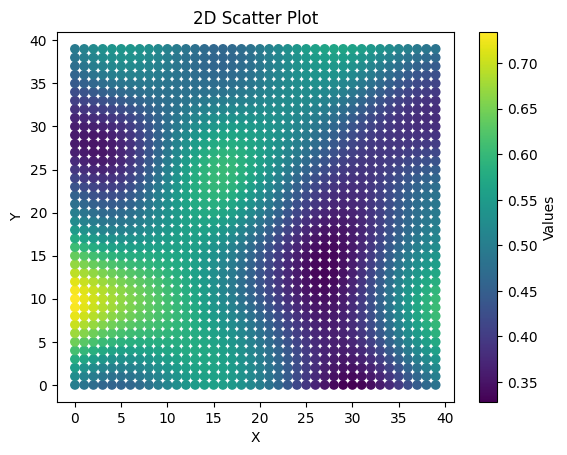

In [92]:
if len(coordinate_arrays) == 2:
    plt.scatter(coordinate_arrays[0], coordinate_arrays[1], c=values_array, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.colorbar(label='Values')
    plt.title('2D Scatter Plot')
    plt.show()
if len(coordinate_arrays) == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(coordinate_arrays[0], coordinate_arrays[1], coordinate_arrays[2], c=values_array, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.colorbar(ax.scatter(coordinate_arrays[0], coordinate_arrays[1], coordinate_arrays[2], c=values_array, cmap='viridis'), label='Values')
    plt.title('3D Scatter Plot')
    plt.show()